In [3]:
import numpy as np
import matplotlib.pyplot as plt

# from rbsSpectra import rbsSpectra
%matplotlib notebook
colors = plt.rcParams['axes.prop_cycle'].by_key()['color'][4]

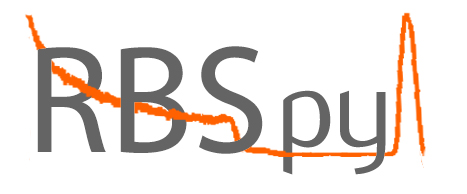

This notebook demonstrates the application of the RBSpy, a python library developed with the propose of loading, manipulating and plotting Rutherford Backscattering Spectrometry data. Its main classes are:
1. the *rbsSpectra*, suitable to work with single align-random measurements;
2. the *multi_rbs*, suitable to work with multiple sets of align-random measurements.

Both classes include methods to perform routine tasks such as do the energy-channel calibration and charge renormalisation. Besides these more experimental oriented methods, RBSpy also include methods specifically introduced for RBS simulation data. The experimental side of the library is revealed here while the simulation part will be explained elsewhere.

# rbsSpectra

In [31]:
# load rbsSpectra
from RBSpy import rbsSpectra

***
```python
rbsSpectra(file_path, type = 'experimental')
```
***

The rbsSpectra is the central object of the RBSpy library. When initialised, it loads the spectrum data from the file on *file_path*. The corresponding channels and counts are stored in rbsSpectra.spectra, a Pandas DataFrame reachable by calling the method get_spectra(). 

*type* indicates the format of the input file. So far, it accepts two files:
 1. **experimental**: A text file containing a column with the channels and another with the counts, the normal experiment output file. The file extensions *.odf* and *.dat* should have columns delimited by spaces (or tabs) and commas, respectively.
 2. **simulation**: Included to load RBSADEC simulations. Although the file is similar to the *experimental .odf* one, when *type* is set to *simulation* some more things are loaded, such as the simulation input parameters. 
 
More file formats can be introduced in the rbsSpectra.load_file() method.

Since the spectrum is stored in a DataFrame, all the normal Pandas tools can be used. 

In [5]:
# path to the data file
path = 'test_files/RBS1_cGAN_AuAu_AsGrown_Align.odf'

# initialise rbsSpectra object
spectrum_file = rbsSpectra(path)

# get the spectrum either using:
spectrum = spectrum_file.get_spectra()
#or:
# spectrum = spectrum_file.spectra

spectrum

,Channel,Counts
0,0.0,1821.0
1,1.0,1824.0
2,2.0,0.0
3,3.0,0.0
4,4.0,0.0
5,5.0,1.0
6,6.0,1.0
7,7.0,0.0
8,8.0,1.0
9,9.0,1.0


In [6]:
# to get the file name:
print(spectrum_file.get_file_name())

# to get the folder where the file is stored:
print(spectrum_file.get_folder())

# to set a different name
spectrum_file.set_name('Align Sample 1')
print(spectrum_file.name)

#Note: If no name is set, the original file name is used

RBS1_cGAN_AuAu_AsGrown_Align.odf
test_files
Align Sample 1


<IPython.core.display.Javascript object>


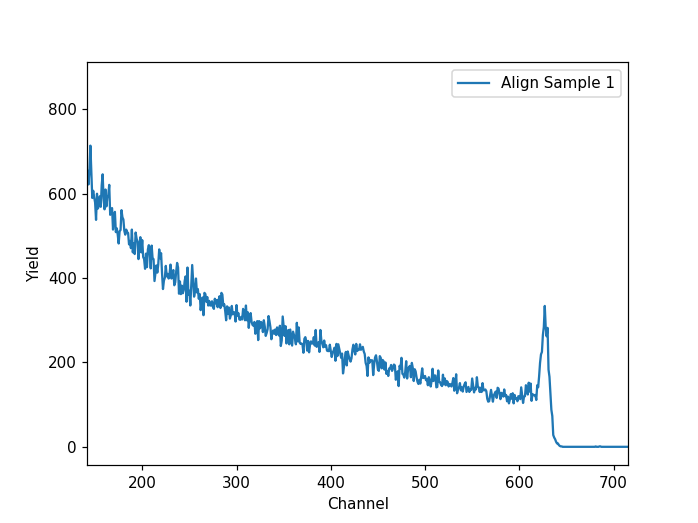

In [7]:
# to plot the Counts vs Channel:
plt.figure()
plt.plot(spectrum.Channel, spectrum.Counts, label = spectrum_file.name)

plt.xlabel('Channel')
plt.ylabel('Yield')
plt.legend();

## Calibrate

There are three methods to introduce energy-channel calibration.
1. by adding the calibration parameters _m_ and _b_, defined as $Energy = Channel \times m  + b$ when declaring the RBSspectra object:
    ```python
    spectrum_file = rbsSpectra(path, m = 2, b = 50)
    ```
2. by using the method ```set_calibration(m, b)```
3. by loading the parameters from the calibration file existing in the same folder as the data file. The calibration file is a text file with the extension ".cal" and with the following structure:
```python
m = 2.40
b = -40
style = 'spkview'
```
The _style_ parameter determines which definition of the  b-parameter is used. It exists mainly due to the SPview software (a popular RBS spectra organizer) defining _b_ as the interception point with the x-axis instead of with the y-axis. To use the normal linear expression set ```style = None```.

All three methods add an additional column to the _spectra_ DataFrame named _energy_. Their use are exemplified below.

### During declaration

In [8]:
# load file and calibrate
path = 'test_files/RBS1_cGAN_AuAu_AsGrown_Align.odf'
spectrum_file = rbsSpectra(path, m= 2.1, b = 75)

# print DataFrame
spectrum_file.get_spectra()

,Channel,Counts,Energy
0,0.0,1821.0,75.0
1,1.0,1824.0,77.1
2,2.0,0.0,79.2
3,3.0,0.0,81.3
4,4.0,0.0,83.4
5,5.0,1.0,85.5
6,6.0,1.0,87.6
7,7.0,0.0,89.7
8,8.0,1.0,91.8
9,9.0,1.0,93.9


### Using set_calibration(m = 2.1, b= 75)

In [9]:
# load file
path = 'test_files/RBS1_cGAN_AuAu_AsGrown_Align.odf'
spectrum_file = rbsSpectra(path)

# calibrate and print DataFrame
spectrum_file.set_calibration(m = 2.1, b= 75)
spectrum_file.get_spectra()

,Channel,Counts,Energy
0,0.0,1821.0,75.0
1,1.0,1824.0,77.1
2,2.0,0.0,79.2
3,3.0,0.0,81.3
4,4.0,0.0,83.4
5,5.0,1.0,85.5
6,6.0,1.0,87.6
7,7.0,0.0,89.7
8,8.0,1.0,91.8
9,9.0,1.0,93.9


### From calibration file

In [10]:
# to check if file exists
print(spectrum_file.get_calibration_file())

# if you want to search in the subdirectories, in case there is no .cal file in the root, set look_subdir=True
print(spectrum_file.get_calibration_file(look_subdir=True))

# print parameters from the file
print('\nParameters:')
!cat {spectrum_file.get_calibration_file()}

test_files/calibration_parameters.cal
test_files/calibration_parameters.cal

Parameters:
m=2.40
b=-40
style='spkview'



In [11]:
# load file
path = 'test_files/RBS1_cGAN_AuAu_AsGrown_Align.odf'
spectrum_file = rbsSpectra(path)

# calibrate from file and print DataFrame
spectrum_file.calibrate_from_file()
spectrum_file.get_spectra()

,Channel,Counts,Energy
0,0.0,1821.0,96.0
1,1.0,1824.0,98.4
2,2.0,0.0,100.8
3,3.0,0.0,103.2
4,4.0,0.0,105.6
5,5.0,1.0,108.0
6,6.0,1.0,110.4
7,7.0,0.0,112.8
8,8.0,1.0,115.2
9,9.0,1.0,117.6


### Plot Energy vs Counts

<IPython.core.display.Javascript object>


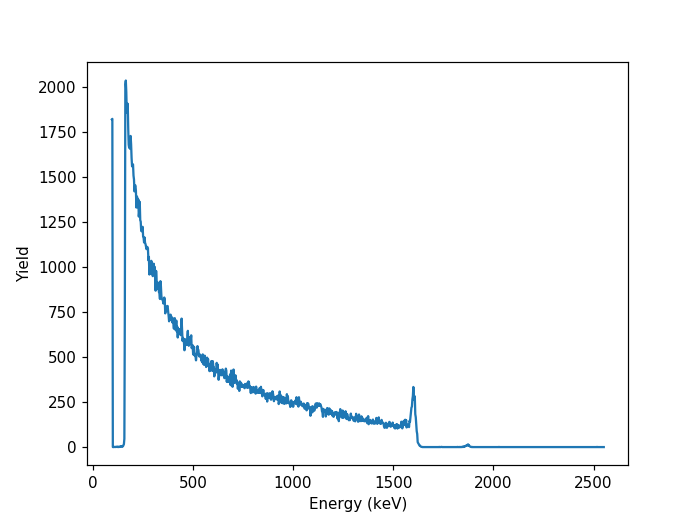

In [12]:
# get spectrum from rbsSpectra object
spectrum = spectrum_file.get_spectra()

# plot yield vs energy
plt.figure()
plt.plot(spectrum.Energy, spectrum.Counts)
plt.xlabel('Energy (keV)')
plt.ylabel('Yield');

## Add Random and normalise charge

To associate the random spectra to the align spectra do the following:
1. load the align and random data to two rbsSpectra objects;
2. calibrate them;
3. use the ```add_random(rbsSpectra random)``` to add the random file to the align object.
4. use the ```renormalization(offset = 15)``` to renormalise the data
5. get the renormalised DataFrame by calling ```get_spectra_normalized()```

The _Counts_ column in the new DataFrame will show the normalised counts instead of the original ones. To access the original values use ```get_spectra()```. The normalised data of the random spectrum can be achieved by ```get_spectra_random()```.

The ```renormalization()``` method will search for the surface barrier in the random spectra. Then, it determines the number of counts in the channel at a distance of the barrier given by the parameter _offset_. The default is  ```offset = 15``` channels. Both align and random spectra are then divided by the number of counts in that channel. 

It is possible to change the renormalisation factor manually by setting the variable '''spectrum_file.renorm''' to another value.

The code below exemplifies the process.

In [13]:
# paths to align and random files
path_align  = 'test_files/RBS1_cGAN_AuAu_AsGrown_Align.odf'
path_rand = 'test_files/RBS1_cGAN_AuAu_AsGrown_Random.odf'

# load files into rbsSpectra objects
spectrum_align = rbsSpectra(path_align)
spectrum_rand = rbsSpectra(path_rand)

# calibrate files
spectrum_align.calibrate_from_file()
spectrum_rand.calibrate_from_file()

# add spectrum_rand to spectrum_align
spectrum_align.add_random(spectrum_rand)

# Normalise the align taking into consideration the random spectrum
spectrum_align.renormalization()

# display the the normalized data
display(spectrum_align.get_spectra_normalized())

# to get the normalised random, instead of loading from spectrum_rand.get_spectra(), use spectrum_align.get_spectra_random()
display(spectrum_align.get_spectra_random())


,Channel,Counts,Energy
0,0.0,0.238476,96.0
1,1.0,0.238869,98.4
2,2.0,0.000000,100.8
3,3.0,0.000000,103.2
4,4.0,0.000000,105.6
5,5.0,0.000131,108.0
6,6.0,0.000131,110.4
7,7.0,0.000000,112.8
8,8.0,0.000131,115.2
9,9.0,0.000131,117.6


,Channel,Counts,Energy
0,0.0,0.228392,96.0
1,1.0,0.237559,98.4
2,2.0,0.000000,100.8
3,3.0,0.000131,103.2
4,4.0,0.000262,105.6
5,5.0,0.000262,108.0
6,6.0,0.000131,110.4
7,7.0,0.000131,112.8
8,8.0,0.000000,115.2
9,9.0,0.000000,117.6


<IPython.core.display.Javascript object>


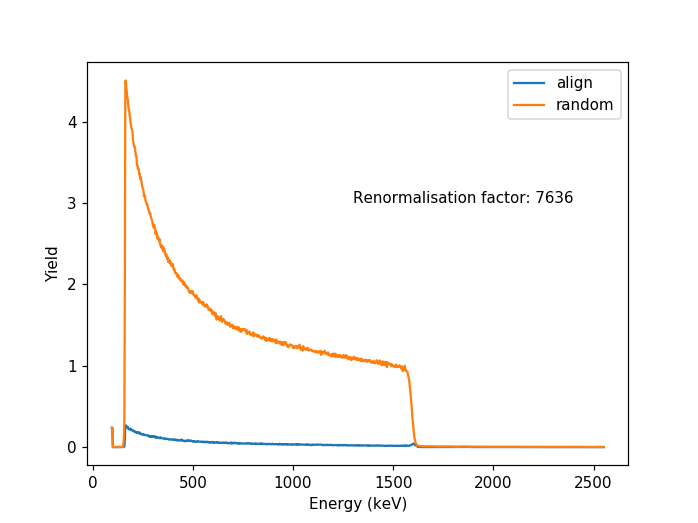

In [14]:
# load the dataframes with the normalised spectra (shown above)
spectrum_align_data = spectrum_align.get_spectra_normalized()
spectrum_rand_data = spectrum_align.get_spectra_random()

# plot both align and random spectra as a function of energy
plt.figure()
plt.plot(spectrum_align_data.Energy, spectrum_align_data.Counts, label = 'align' )
plt.plot(spectrum_rand_data.Energy , spectrum_rand_data.Counts , label = 'random')
plt.xlabel('Energy (keV)')
plt.ylabel('Yield')
plt.legend()


# check the renormalisation factor used
plt.text(1300, 3, 'Renormalisation factor: %d' %spectrum_align.renorm);

### Manually change the renormalisation factor

<IPython.core.display.Javascript object>


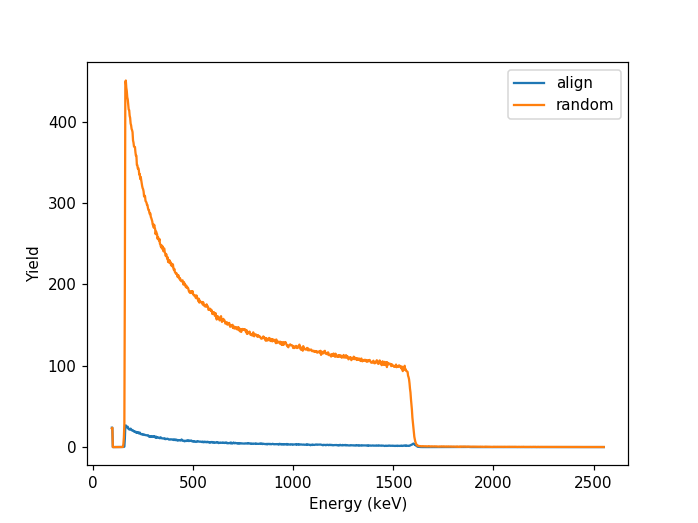

In [15]:
from copy import deepcopy

# copy files to new object
spectrum_align_renorn2 = deepcopy(spectrum_align)

# set barrier at 100 counts instead of 1
spectrum_align_renorn2.renorm = spectrum_align.renorm/100

# reload the renomalised spectra
spectrum_align2 = spectrum_align_renorn2.get_spectra_normalized()
spectrum_random2 = spectrum_align_renorn2.get_spectra_random()

# plot
plt.figure()
plt.plot(spectrum_align2.Energy, spectrum_align2.Counts, label = 'align')
plt.plot(spectrum_random2.Energy, spectrum_random2.Counts, label = 'random')
plt.xlabel('Energy (keV)')
plt.ylabel('Yield')
plt.legend();

## Create Figure

To avoid formating the figure every time spectra are plot, call 
```python
RBSpy.rbsAux.create_figure(xlim = [200, 1650], ylim=[-0.1, 2.5], title = '', fig_size=[6, 4], depth_scale = True)
``` 
to obtain a standard figure. Note that the depth scale on the top side of the figure is only correct for GaN. To use it for other materials change (or overwrite) the ```depth2energy()``` and ```energy2depth()``` methods in RBSpy.rbsAux. To remove the depth scale, set ```depth_scale = False```.

<IPython.core.display.Javascript object>


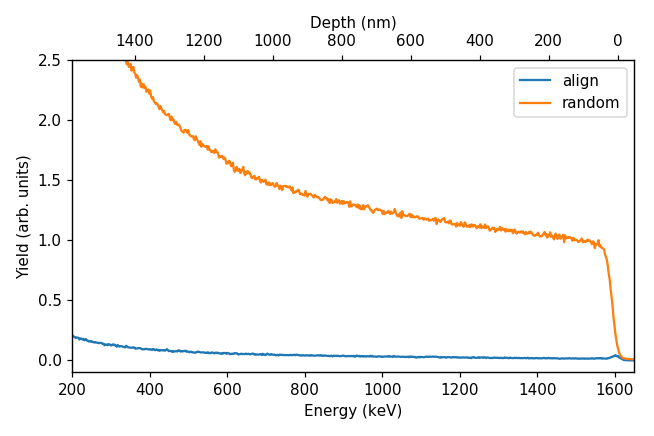

In [16]:
# import the RBSpy.rbsAux methods
import RBSpy.rbsAux as raux

# create the figure
fig, ax = raux.create_figure()

# plot on the figure
ax.plot(spectrum_align_data.Energy, spectrum_align_data.Counts, label = 'align')
ax.plot(spectrum_rand_data.Energy, spectrum_rand_data.Counts, label = 'random')
ax.legend();

<IPython.core.display.Javascript object>


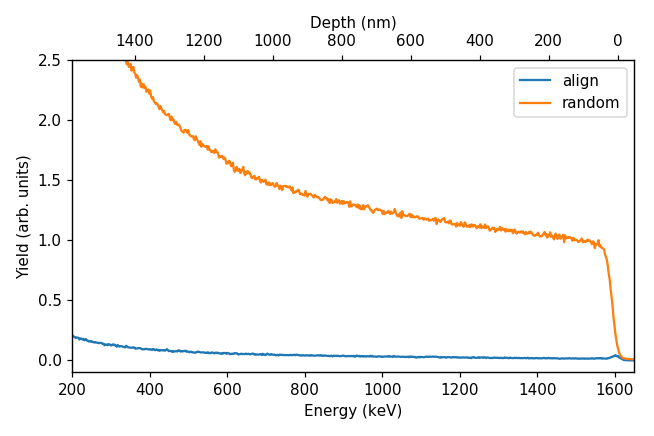

In [17]:
# method 2:
from RBSpy.rbsAux import create_figure

fig, ax = create_figure()

ax.plot(spectrum_align_data.Energy, spectrum_align_data.Counts, label = 'align')
ax.plot(spectrum_rand_data.Energy, spectrum_rand_data.Counts, label = 'random')
ax.legend();

# multi_rbs

In [32]:
# laod multi_rbs
from RBSpy import multi_rbs

***
```python
multi_rbs(file_path_array, type_file = 'exp', offset = 90, **kwarg)
```
***

_multi_rbs_ simplifies to a great the extent the process of analysing sets of RBS/c measurements. The _file_path_array_ contains the path of the align and random spectra as well as the name of the measurement. It should be given as a list with the following format:
```
file_path_array = [
    ['align path 1',
     'random path 1',
     'sample name 1'
    ],
    ['align path 2',
     'random path 2',
     'sample name 2'
    ]
]
```

When an _multi_rbs_ object is initiated, it runs the _load_multiple_ method:
```python
def load_multiple (file_path_array, type_file = 'exp', offset = 90):
    rbs = []
    for p in filePathArray:
        rbs.append(rbsSpectra(p[0], type_file=type_file))
        rbs[-1].setName(p[2])
        rbs[-1].addRandom(rbsSpectra(p[1], type_file=type_file))
        if 'exp' in type_file:
            rbs[-1].calibrate_from_file()
        rbs[-1].renormalization(offset = offset)
    return rbs
```

This method does the following for each set of measurements:
1. initialises an rbsSpectra (as in the section 1)
2. sets its name
3. adds the random spectrum
4. calibrate both align and random spectra from the file
5. renomalises both align and random spectra

**type_file** : The type_file can be used to define different file formats. So far, if set to 'exp', it assumes the '.odf' or '.dat' formats. If set to 'simulation', it assumes the RBSADEC simulation file format. Default is 'exp'. See Section 1 for further details on the file structures.

**offset** : The offset is used to set the distance from the spectrum barrier where the renormalised spectra is normalised to one (see Section 1.2). Default here is 90.

## Load Files

In [19]:
files_path = [
    ['test_files/RBS1_cGAN_AuAu_AsGrown_Align.odf',
     'test_files/RBS1_cGAN_AuAu_AsGrown_Random.odf',
     'As-Grown'
    ]
]

rbs_files = multi_rbs(files_path)

If you want to extract the rbsSpectra call the rbs_files list (i.e. rbs_files.rbs_files)

In [20]:
print(rbs_files.rbs_files)

# load the pandas table from the align spectrum 0
rbs_files.rbs_files[0].get_spectra_normalized()

,Channel,Counts,Energy
0,0.0,0.223463,96.0
1,1.0,0.223831,98.4
2,2.0,0.000000,100.8
3,3.0,0.000000,103.2
4,4.0,0.000000,105.6
5,5.0,0.000123,108.0
6,6.0,0.000123,110.4
7,7.0,0.000000,112.8
8,8.0,0.000123,115.2
9,9.0,0.000123,117.6


## Plot

To plot, we first create a standard RBS figure by calling the method *create_fig()*. This will return a figure with two x-axis (Energy and Depth) and one y-axis (Yield). Note that the depth is correct for GaN (see Section 1.3). 

Afterwards, we call _multi_rbs.plot()_ to plot the entire measurement set. Most of the matplotlib keywords also work  _multi_rbs.plot()_.

<IPython.core.display.Javascript object>


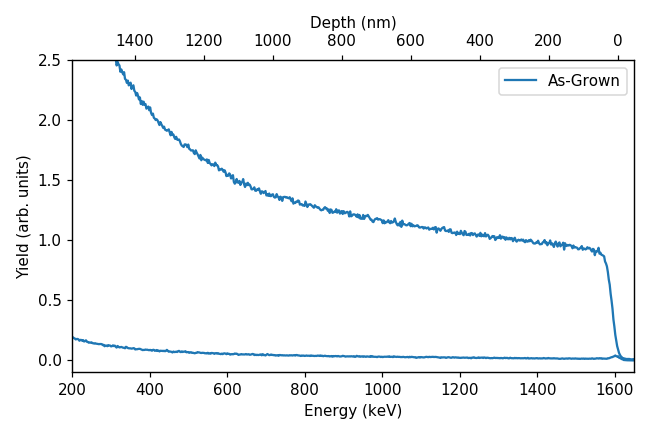

In [21]:
# create figure
fig, ax = rbs_files.create_fig()
rbs_files.plot()

<IPython.core.display.Javascript object>


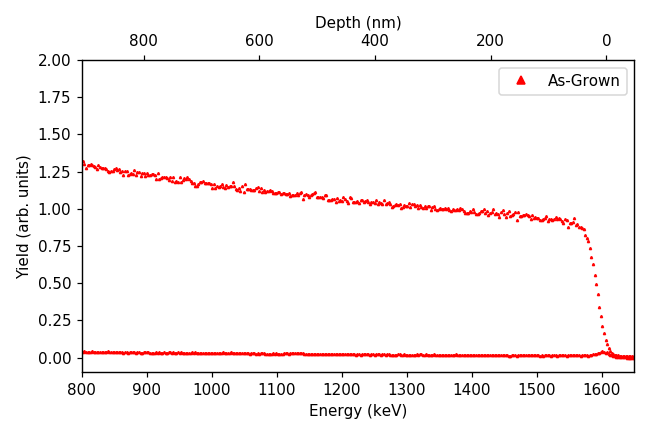

In [22]:
# create a costum figure 
fig, ax = rbs_files.create_fig(fig_size=[6,4], xlim=[800,1650], ylim=[-0.1, 2])

# plot using red triangles
rbs_files.plot(line_style='^', colors=['r'], ms=1.4)
ax.legend(markerscale=4);

## Loading the measurement set

<IPython.core.display.Javascript object>


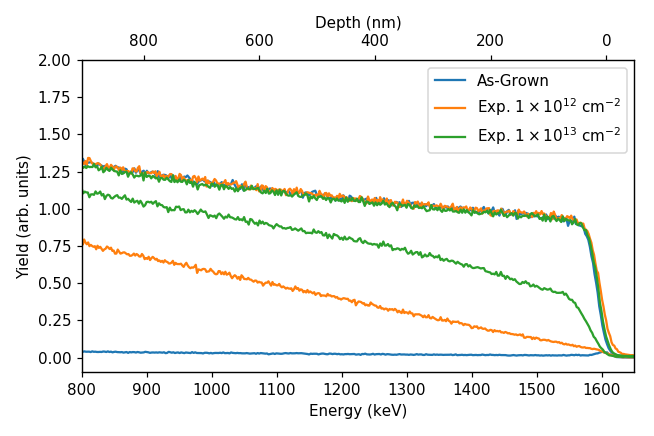

In [23]:
# path to align and random files of multiple samples
files_path = [
    ['test_files/RBS1_cGAN_AuAu_AsGrown_Align.odf',
     'test_files/RBS1_cGAN_AuAu_AsGrown_Random.odf',
     'As-Grown'
    ],
    ['test_files/1e12/RBS1CGAN_185AU_1E12_ALIGN.odf',
     'test_files/1e12/RBS1CGAN_185AU_1E12_RANDOM.odf',
     r'Exp. $1 \times 10^{12}$ cm$^{-2}$'
    ],
    ['test_files/1e13/RBS1_cGAN_AuAu_1e13_Align.odf',
     'test_files/1e13/RBS1_cGAN_AuAu_1e13_Random.odf',
     r'Exp. $1 \times 10^{13}$ cm$^{-2}$'
    ]
]

# load files using an offset 95 (see above);
# the energy-channel calibration is obtained from the '.cal' file on each folder
rbs_files = multi_rbs(files_path, offset=95)

# create a figure and plot
fig, ax = rbs_files.create_fig(fig_size=[6,4], xlim=[800,1650], ylim=[-0.1, 2])
rbs_files.plot()

## Plotting only one random from the set

<IPython.core.display.Javascript object>


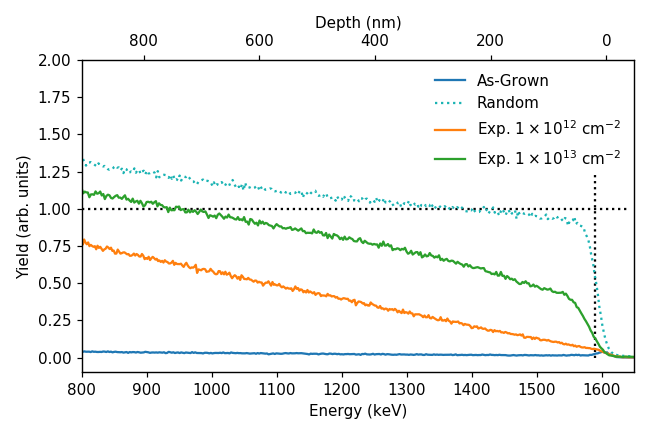

In [24]:
# create figure
fig, ax = rbs_files.create_fig(fig_size=[6,4], xlim=[800,1650], ylim=[-0.1, 2])

# the 'random_id' parameter is the index of the random spectrum to plot (here 0 indicates the random from the as-grown sample). 
# if random_id: None, no random is plotted
rbs_files.plot(params_rand={'random_id': 0, 'color':(0.1,0.7,0.7), 'marker':':', 'label':'Random'})

# the figure and axis are matplotlib objects and hence it can be formated and manipulated as usually
ax.legend(frameon=False)
ax.vlines(1590, 0, 1.25, linestyles=':')
ax.hlines(1, 800, 1640, linestyles=':');

## Examples

### Inset axis

<IPython.core.display.Javascript object>


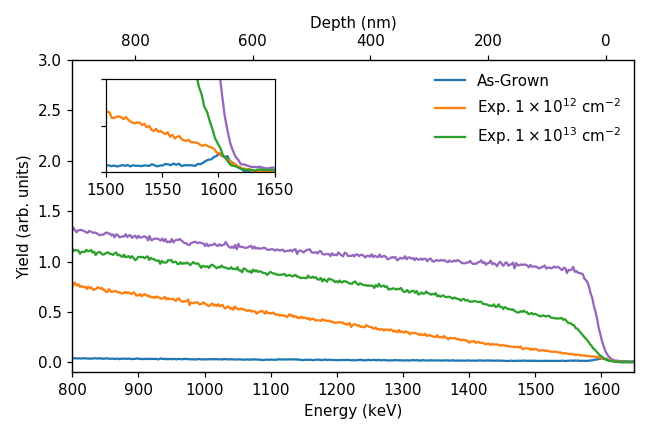

In [25]:
# create main figure
fig, ax = rbs_files.create_fig(fig_size=[6,4], xlim=[800,1650], ylim=[-0.1, 3])

# define parameters for random:
params_rand={'random_id': 0, 'color': plt.rcParams['axes.prop_cycle'].by_key()['color'][4]}

# plot main plot
rbs_files.plot(params_rand = params_rand)
ax.legend(frameon = False)

# create inset axis
ax_small = ax.inset_axes((0.06,0.7-0.06,0.3,0.3))

# plot the same spectra in the inset axis by passing it in the argument:
rbs_files.plot(ax_small, params_rand=params_rand)

# adjust inset plot and remove legend
ax_small.set_xlim(1500,1650)
ax_small.set_ylim(0,0.2)
ax_small.set_yticklabels([])
ax_small.get_legend().remove()

### Manipulating data

In [26]:
from ipywidgets import interact#, interactive, fixed, interact_manual, Checkbox

<IPython.core.display.Javascript object>


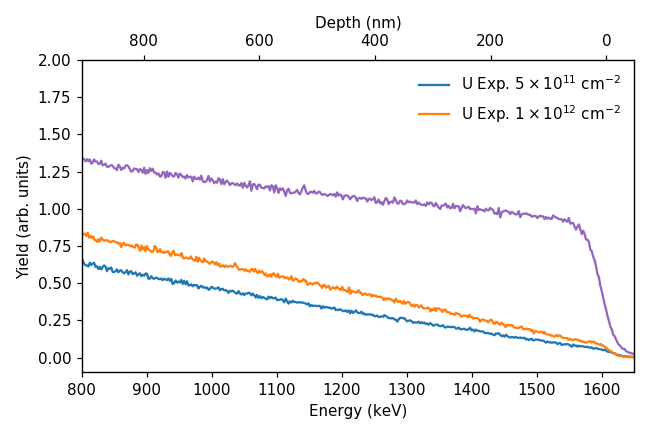

interactive(children=(FloatSlider(value=50.0, description='rand'), FloatSlider(value=50.0, description='align'), Dropdown(description='line', options=(0, 1), value=0), Output()), _dom_classes=('widget-interact',))

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

In [27]:
files_path_2 = [
    ['test_files/2nd_set/5e11/RBS1_CGAN_3-8U_5E11_0O_ALIGN.odf',
     'test_files/2nd_set/5e11/RBS1_CGAN_3-8U_5E11_0O_RANDOM.odf',
    r'U Exp. $5\times10^{11}$ cm$^{-2}$' # 'Normal Irrad. 5e11'
    ],
    ['test_files/2nd_set/1e12/RBS1CGAN_3-8U_1E12_ALIGN.odf',
     'test_files/2nd_set/1e12/RBS1CGAN_3-8U_1E12_RANDOM.odf',
     r'U Exp. $1\times10^{12}$ cm$^{-2}$' #'Normal Irrad. 1e12'
    ]
]

rbs_files_2 = multi_rbs(files_path_2)

fig, ax = rbs_files_2.create_fig(fig_size=[6,4], xlim=[800,1650], ylim=[-0.1, 2])

#define parameters for random:
params_rand={'random_id': 0, 'color': plt.rcParams['axes.prop_cycle'].by_key()['color'][4]}

#plot main plot
rbs_files_2.plot(params_rand=params_rand)
ax.legend(frameon=False)

# load an interactive ipywidget to interact with the data using the method modify_simulation_delay
interact(rbs_files_2.modify_simulation_delay, rand = (0.0,100,0.1), align = (0.0,100,0.1), line = range(0, rbs_files_2.shape))


### Hide lines

Only works if the matplotlib notebook backend is in use. To use it run
```
%matplotlib notebook
```

In [28]:
from ipywidgets import interact,Checkbox

def update_plot_lines(**kwargs):
    ax = plt.gcf().axes[0]
    list_lines = []
    for l in ax.legend().texts:
        list_lines.append(kwargs[l.get_text()])
        list_lines.append(kwargs[l.get_text() + ' random'])
    
    hide_line(ax, list_lines)
    ax.legend()
    
def hide_line(ax,list_lines):
    for l, i in zip(ax.lines, list_lines):
        l.set_visible(i)

def hide_line_interact():
    lines_names = []
    for l in ax.legend().texts:
        text = l.get_text()
        lines_names.append(text + ' random')
        lines_names.append(text)

    chk1 = [Checkbox(description=a, value=True) for a in lines_names]
    dic = {c.description: c.value for c in chk1}

    interact(update_plot_lines,  **dic);

<IPython.core.display.Javascript object>


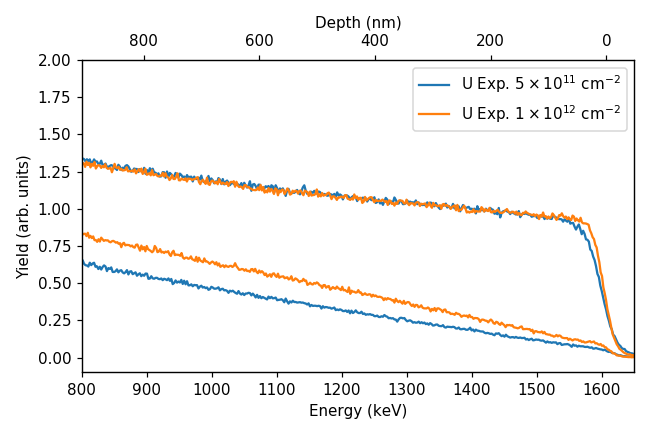

interactive(children=(Checkbox(value=True, description='U Exp. $5\\times10^{11}$ cm$^{-2}$'), Checkbox(value=True, description='U Exp. $1\\times10^{12}$ cm$^{-2}$'), Checkbox(value=True, description='U Exp. $5\\times10^{11}$ cm$^{-2}$ random'), Checkbox(value=True, description='U Exp. $1\\times10^{12}$ cm$^{-2}$ random'), Output()), _dom_classes=('widget-interact',))

In [29]:
files_path_2 = [
    ['test_files/2nd_set/5e11/RBS1_CGAN_3-8U_5E11_0O_ALIGN.odf',
     'test_files/2nd_set/5e11/RBS1_CGAN_3-8U_5E11_0O_RANDOM.odf',
    r'U Exp. $5\times10^{11}$ cm$^{-2}$' # 'Normal Irrad. 5e11'
    ],
    ['test_files/2nd_set/1e12/RBS1CGAN_3-8U_1E12_ALIGN.odf',
     'test_files/2nd_set/1e12/RBS1CGAN_3-8U_1E12_RANDOM.odf',
     r'U Exp. $1\times10^{12}$ cm$^{-2}$' #'Normal Irrad. 1e12'
    ]
]


rbs_files_2 = multi_rbs(files_path_2)

fig, ax = rbs_files_2.create_fig(fig_size=[6,4], xlim=[800,1650], ylim=[-0.1, 2])

#plot main plot
rbs_files_2.plot()

hide_line_interact()

## Plotting multiple measurements sets

_RBSpy.multi_rbs()_ can also be used to plot more than one set of measurements. Instead of adding all the measurement files to one _file_path_array_ (as done above), it is possible to declare different files lists, one for each set, and plot all in the same figure. This permits to keep track of the sets and perform tasks independently on each of them, particularly helpful when plotting experimental and simulated data on the same figure.

When plotted using the *RBSpy.multi_rbs.plot()*, the spectra from the various sets of measurements are shown renormalised and calibrated automatically. 



<IPython.core.display.Javascript object>


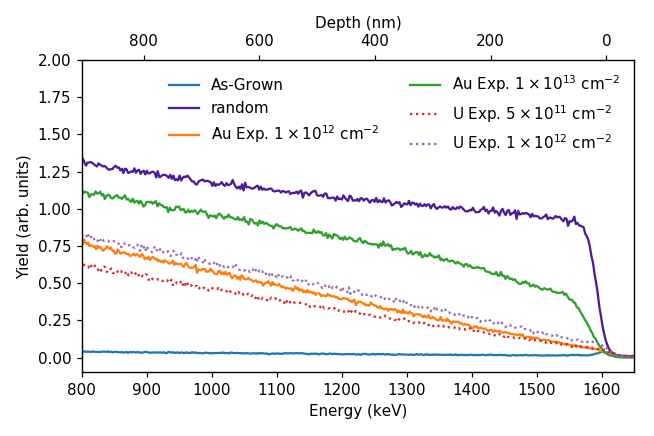

In [30]:
# file paths to first set of measurements
files_path_1 = [
    ['test_files/RBS1_cGAN_AuAu_AsGrown_Align.odf',
     'test_files/RBS1_cGAN_AuAu_AsGrown_Random.odf',
     'As-Grown'
    ],
    ['test_files/1e12/RBS1CGAN_185AU_1E12_ALIGN.odf',
     'test_files/1e12/RBS1CGAN_185AU_1E12_RANDOM.odf',
     r'Au Exp. $1 \times 10^{12}$ cm$^{-2}$' #'1e12 v2'
    ],
    ['test_files/1e13/RBS1_cGAN_AuAu_1e13_Align.odf',
     'test_files/1e13/RBS1_cGAN_AuAu_1e13_Random.odf',
     r'Au Exp. $1 \times 10^{13}$ cm$^{-2}$'
    ]
]

# file paths to second set of measurements
files_path_2 = [
    ['test_files/2nd_set/5e11/RBS1_CGAN_3-8U_5E11_0O_ALIGN.odf',
     'test_files/2nd_set/5e11/RBS1_CGAN_3-8U_5E11_0O_RANDOM.odf',
    r'U Exp. $5\times10^{11}$ cm$^{-2}$' # 'Normal Irrad. 5e11'
    ],
    ['test_files/2nd_set/1e12/RBS1CGAN_3-8U_1E12_ALIGN.odf',
     'test_files/2nd_set/5e11/RBS1_CGAN_3-8U_5E11_0O_RANDOM.odf',
     r'U Exp. $1\times10^{12}$ cm$^{-2}$' #'Normal Irrad. 1e12'
    ]
]

# load both sets
rbs_files_1 = multi_rbs(files_path_1, offset=95)
rbs_files_2 = multi_rbs(files_path_2, offset=95)

# create a fig associated with one of the sets (e.g. rbs_file_1)
fig, ax = rbs_files_1.create_fig(fig_size=[6,4], xlim=[800,1650], ylim=[-0.1, 2])

# plot the first set on its figure, showing only the random from the as-grown sample
rbs_files_1.plot(params_rand={'random_id': 0, 'color':(0.3,0.1,0.6), 'label':'random'})

# plot the second set on the same figure as the first set; change the line style to differenciate the two sets and
# do not plot any random.
rbs_files_2.plot(ax, line_style=':', params_rand={'random_id': None})

# adjust legend
ax.legend(frameon=False, ncol=2);